In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
df_hdp = pd.read_csv('Heart_Disease_Prediction.csv')

In [3]:
X_variables = df_hdp.iloc[:, 1:14].values
Y_target = df_hdp.iloc[:, 14].values

In [4]:
train_X, test_X, train_Y, test_Y = train_test_split(X_variables, Y_target, test_size=0.15, random_state=0)

In [5]:
scal = StandardScaler()

scal.fit(train_X)

train_X_st = scal.transform(train_X)
test_X_st = scal.transform(test_X)

In [6]:
pca = PCA(0.95)
pca.fit(train_X_st)

train_X_pca = pca.transform(train_X_st)
test_X_pca = pca.transform(test_X_st)

In [7]:
pca.explained_variance_ratio_

array([0.2425722 , 0.12594739, 0.09401541, 0.09139383, 0.07304398,
       0.06990811, 0.06289545, 0.05786867, 0.05311522, 0.0426377 ,
       0.03319854, 0.03075784])

In [8]:
np.shape(train_X_pca)

(229, 12)

In [19]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(train_X_pca, train_Y)

LogisticRegression()

In [16]:
logisticRegr.predict(test_X_pca[0:15])

array(['Absence', 'Absence', 'Presence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence'], dtype=object)

In [17]:
test_Y[0:15]

array(['Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Presence'], dtype=object)

In [20]:
logisticRegr.score(test_X_pca, test_Y)

0.8536585365853658

In [13]:
df_hdp.iloc[250:259]

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
250,250,54,1,4,120,188,0,0,113,0,1.4,2,1,7,Presence
251,251,44,1,2,130,219,0,2,188,0,0.0,1,0,3,Absence
252,252,44,1,4,112,290,0,2,153,0,0.0,1,1,3,Presence
253,253,51,1,3,110,175,0,0,123,0,0.6,1,0,3,Absence
254,254,59,1,3,150,212,1,0,157,0,1.6,1,0,3,Absence
255,255,71,0,2,160,302,0,0,162,0,0.4,1,2,3,Absence
256,256,61,1,3,150,243,1,0,137,1,1.0,2,0,3,Absence
257,257,55,1,4,132,353,0,0,132,1,1.2,2,1,7,Presence
258,258,64,1,3,140,335,0,0,158,0,0.0,1,0,3,Presence


In [14]:
z = df_hdp.iloc[250:259, 1:14].values
z = scal.transform(z)
z = pca.transform(z)
logisticRegr.predict(z)


array(['Presence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Presence', 'Absence'], dtype=object)

In [24]:
pca2 = PCA(2)
pca2.fit(train_X_st)

train_X_pca2 = pca2.transform(train_X_st)
test_X_pca2 = pca2.transform(test_X_st)

logisticRegr_2 = LogisticRegression(solver = 'lbfgs')

logisticRegr_2.fit(train_X_pca2, train_Y)

LogisticRegression()

In [25]:
logisticRegr_2.score(test_X_pca2, test_Y)

0.6829268292682927

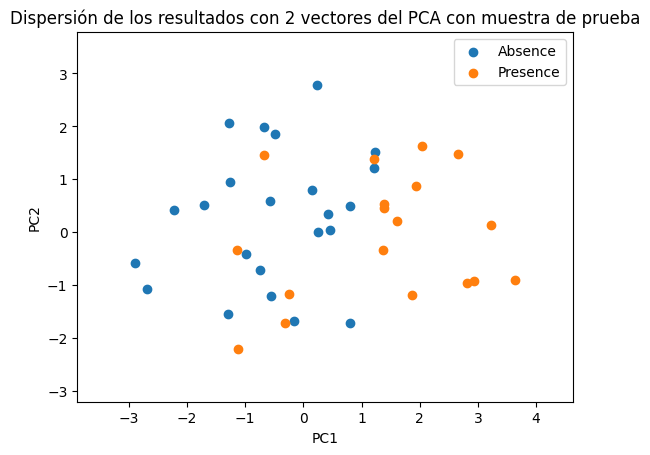

In [30]:
X_set, y_set = test_X_pca2[0:100], test_Y[0:100]

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                     stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                     stop = X_set[:, 1].max() + 1, step = 0.01))

#plt.contourf(X1, X2, logisticRegr_2.predict(np.array([X1.ravel(),
            # X2.ravel()]).T).reshape(X1.shape), alpha = 0.75)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)

# title for scatter plot
plt.title('Dispersión de los resultados con 2 vectores del PCA con muestra de prueba')
plt.xlabel('PC1') # for Xlabel
plt.ylabel('PC2') # for Ylabel
plt.legend()

# show scatter plot
plt.show()